<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Data_Analysis_Machine_Learning/blob/master/3.%20Risk%20Management%20and%20Financial%20Analysis/House%20Prices/House_Prices_Predictions_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Content
1. [Preparing Project](#1)
    * 1.1 [Import Libraries](#1.1)
    * 1.2 [Import Dataset](#1.2)
2. [Data Exploration](#2)
    * 2.1 [Getting to Know the Varibales](#2.1)
    * 2.2 [Analyzing Unique Values](#2.2)
    * 2.3 [Analyzing Statistical Analysis](#2.3)
    * 2.4 [Numeric & Categorical Columns](#2.4)
    * 2.5 [Analyzing Null Values](#2.5)
        * 2.5.1 [Drop Columns With Lots of Missing Values](#2.5.1)
        * 2.5.2 [Dealing with Missing Values Of Numeric Columns](#2.5.2)
        * 2.5.3 [Dealing With Missing Values Of Categorical Columns](#2.5.3)
3. [EDA](#3)
    * 3.1 [Distributions](#3.1)
    * 3.2 [Correlation Bar](3.2)
    * 3.3 [Correlation Heatmap](#3.3)
        * 3.3.1 [Filtering High Correlated Featuers With SalePrice](#3.3.1)
4. [Preprocessing](#4)
    * 4.1 [Encoding Categorical Variables](#4.1)
5. [Preparing for Modelling](#5)
    * 5.1 [Split Depentend/Indepented Variables](#5.1)
    * 5.2 [Definning Train/Test Sets](5.2)
    * 5.3 [Feature Scaling](#5.3)
6. [Machine Learning Model](#6)
    * 6.1 [Linear Regression](#6.1)
    * 6.2 [RandomForest Regression](#6.2)
        * 6.2.1 [Hyperparameter Optimization on RandomForest Model](#6.2.1)

# 1. Prepering Project

## 1.1 Import Libraries <a id=1.1></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## 1.2 Import Dataset <a id=1.2></a>

In [ ]:
df_train = pd.read_csv("https://raw.githubusercontent.com/mohammadreza-mohammadi94/Data_Analysis_Machine_Learning/master/3.%20Risk%20Management%20and%20Financial%20Analysis/House%20Prices/train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 2. Data Exploration <a id=2></a>

## 2.1 Getting to Know the Varibales <a id=2.1></a>

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

1. **Id**: Unique identifier for each house.
2. **MSSubClass**: Identifies the type of dwelling involved in the sale (e.g., 20 = 1-story 1946 & newer, 30 = 1-story 1945 & older).
3. **MSZoning**: General zoning classification of the sale (e.g., RL = Residential Low Density).
4. **LotFrontage**: Linear feet of street connected to the property.
5. **LotArea**: Lot size in square feet.
6. **Street**: Type of road access to the property (e.g., Pave = Paved).
7. **Alley**: Type of alley access to the property (e.g., Grvl = Gravel).
8. **LotShape**: General shape of property (e.g., Reg = Regular).
9. **LandContour**: Flatness of the property (e.g., Lvl = Near Flat/Level).
10. **Utilities**: Type of utilities available (e.g., AllPub = All public Utilities).
11. **LotConfig**: Lot configuration (e.g., Inside = Inside lot).
12. **LandSlope**: Slope of property (e.g., Gtl = Gentle slope).
13. **Neighborhood**: Physical locations within Ames city limits (e.g., CollgCr = College Creek).
14. **Condition1**: Proximity to various conditions (e.g., Artery = Adjacent to arterial street).
15. **Condition2**: Proximity to various conditions (if more than one is present).
16. **BldgType**: Type of dwelling (e.g., 1Fam = Single-family Detached).
17. **HouseStyle**: Style of dwelling (e.g., 2Story = Two-story).
18. **OverallQual**: Rates the overall material and finish of the house (10 = Very Excellent, 1 = Very Poor).
19. **OverallCond**: Rates the overall condition of the house (10 = Very Excellent, 1 = Very Poor).
20. **YearBuilt**: Original construction date.
21. **YearRemodAdd**: Remodel date (same as construction date if no remodeling/additions).
22. **RoofStyle**: Type of roof (e.g., Gable = Gable).
23. **RoofMatl**: Roof material (e.g., CompShg = Standard (Composite) Shingle).
24. **Exterior1st**: Exterior covering on house (e.g., VinylSd = Vinyl Siding).
25. **Exterior2nd**: Exterior covering on house (if more than one material).
26. **MasVnrType**: Masonry veneer type (e.g., BrkCmn = Brick Common).
27. **MasVnrArea**: Masonry veneer area in square feet.
28. **ExterQual**: Evaluates the quality of the material on the exterior (Ex = Excellent, Gd = Good).
29. **ExterCond**: Evaluates the present condition of the material on the exterior (Ex = Excellent, Gd = Good).
30. **Foundation**: Type of foundation (e.g., PConc = Poured Contrete).
31. **BsmtQual**: Evaluates the height of the basement (Ex = Excellent, Gd = Good).
32. **BsmtCond**: Evaluates the general condition of the basement (Ex = Excellent, Gd = Good).
33. **BsmtExposure**: Refers to walkout or garden level walls (Gd = Good Exposure).
34. **BsmtFinType1**: Rating of basement finished area (e.g., GLQ = Good Living Quarters).
35. **BsmtFinSF1**: Type 1 finished square feet.
36. **BsmtFinType2**: Rating of basement finished area (if multiple types).
37. **BsmtFinSF2**: Type 2 finished square feet.
38. **BsmtUnfSF**: Unfinished square feet of basement area.
39. **TotalBsmtSF**: Total square feet of basement area.
40. **Heating**: Type of heating (e.g., GasA = Gas forced warm air furnace).
41. **HeatingQC**: Heating quality and condition (Ex = Excellent, Gd = Good).
42. **CentralAir**: Central air conditioning (Y = Yes, N = No).
43. **Electrical**: Electrical system (e.g., SBrkr = Standard Circuit Breakers & Romex).
44. **1stFlrSF**: First-floor square feet.
45. **2ndFlrSF**: Second-floor square feet.
46. **LowQualFinSF**: Low quality finished square feet (all floors).
47. **GrLivArea**: Above grade (ground) living area square feet.
48. **BsmtFullBath**: Basement full bathrooms.
49. **BsmtHalfBath**: Basement half bathrooms.
50. **FullBath**: Full bathrooms above grade.
51. **HalfBath**: Half baths above grade.
52. **BedroomAbvGr**: Bedrooms above grade (does NOT include basement bedrooms).
53. **KitchenAbvGr**: Kitchens above grade.
54. **KitchenQual**: Kitchen quality (Ex = Excellent, Gd = Good).
55. **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms).
56. **Functional**: Home functionality (Typ = Typical Functionality).
57. **Fireplaces**: Number of fireplaces.
58. **FireplaceQu**: Fireplace quality (Ex = Excellent, Gd = Good).
59. **GarageType**: Garage location (e.g., Attchd = Attached to home).
60. **GarageYrBlt**: Year garage was built.
61. **GarageFinish**: Interior finish of the garage (e.g., RFn = Rough Finished).
62. **GarageCars**: Size of garage in car capacity.
63. **GarageArea**: Size of garage in square feet.
64. **GarageQual**: Garage quality (Ex = Excellent, Gd = Good).
65. **GarageCond**: Garage condition (Ex = Excellent, Gd = Good).
66. **PavedDrive**: Paved driveway (Y = Paved, N = Not Paved).
67. **WoodDeckSF**: Wood deck area in square feet.
68. **OpenPorchSF**: Open porch area in square feet.
69. **EnclosedPorch**: Enclosed porch area in square feet.
70. **3SsnPorch**: Three-season porch area in square feet.
71. **ScreenPorch**: Screen porch area in square feet.
72. **PoolArea**: Pool area in square feet.
73. **PoolQC**: Pool quality (Ex = Excellent, Gd = Good).
74. **Fence**: Fence quality (GdPrv = Good Privacy).
75. **MiscFeature**: Miscellaneous feature not covered in other categories (e.g., TenC = Tennis Court).
76. **MiscVal**: $Value of miscellaneous feature.
77. **MoSold**: Month Sold (MM).
78. **YrSold**: Year Sold (YYYY).
79. **SaleType**: Type of sale (e.g., WD = Warranty Deed - Conventional).
80. **SaleCondition**: Condition of sale (Normal = Normal Sale).
81. **SalePrice**: Sale price in dollars.

In [ ]:
df_train.shape

(1460, 81)

In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 2.2 Analyzing Unique Values <a id=2.1></a>

In [ ]:
pd.DataFrame(df_train.nunique(), columns=["Unique Values"]).T

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Unique Values,1460,15,5,110,1073,2,2,4,4,2,...,8,3,4,4,21,12,5,9,6,663


## 2.3 Analyzing Statistical Analysis <a id=2.2></a>

In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## 2.4 Numeric & Categorical Columns <a id=2.4></a>

In [ ]:
# Numeric Columns
df_train.select_dtypes(include="number").columns.to_frame().reset_index(drop=True)

,0
0,Id
1,MSSubClass
2,LotFrontage
3,LotArea
4,OverallQual
5,OverallCond
6,YearBuilt
7,YearRemodAdd
8,MasVnrArea
9,BsmtFinSF1


In [ ]:
# Categorical Columns
df_train.select_dtypes(include="object").columns.to_frame().reset_index(drop=True)

,0
0,MSZoning
1,Street
2,Alley
3,LotShape
4,LandContour
5,Utilities
6,LotConfig
7,LandSlope
8,Neighborhood
9,Condition1


## 2.5 Analyzing Null Values <a id=2.5></a>

In [ ]:
df_train.isna().values.any()

True

In [ ]:
df_train.isna().values.sum()

7829

In [ ]:
df_train.isna().sum()[df_train.isna().sum()
> 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
# Calculate percentage of missing values in each columns
null_percent = df_train.isna().sum() / len(df_train) * 100
null_percent[null_percent > 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

### 2.5.1 Drop Columns With Lots of Missing Values <a id=2.5.1></a>

In [ ]:
cols_to_drop = null_percent[null_percent > 50].keys()
cols_to_drop

Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [ ]:
df_train.drop(columns=['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
df_train.shape

(1460, 76)

### 2.5.2 Dealing with Missing Values Of Numeric Columns <a id=2.5.2></a>

In [ ]:
df_train.select_dtypes(include="number").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [ ]:
# Filiing missing values with "mean"
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean())

### 2.5.3 Dealing With Missing Values Of Categorical Columns <a id=2.5.3></a>

In [ ]:
df_train.select_dtypes(include="object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  ExterQual      1460 non-null   object
 17  ExterCond      1460 non-null   object
 18  Foundation     1460 non-null

In [ ]:
df_train['BsmtQual'] = df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['BsmtCond'] = df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_train['GarageType'] = df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train['GarageFinish'] = df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual'] = df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond'] = df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])

In [ ]:
df_train.isna().values.any()

False

In [ ]:
df_train.isna().sum()[df_train.isna().sum()
> 0]
# There are no missing values any more

Series([], dtype: int64)

# 3. EDA <a id=3></a>

## 3.1 Distributions <a id=3.1></a>

In [ ]:
def dist_plot(col):
    plt.figure(figsize=(5, 5))
    sns.set_style('darkgrid')
    sns.displot(df_train[col], kde=True, color='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

<Figure size 500x500 with 0 Axes>

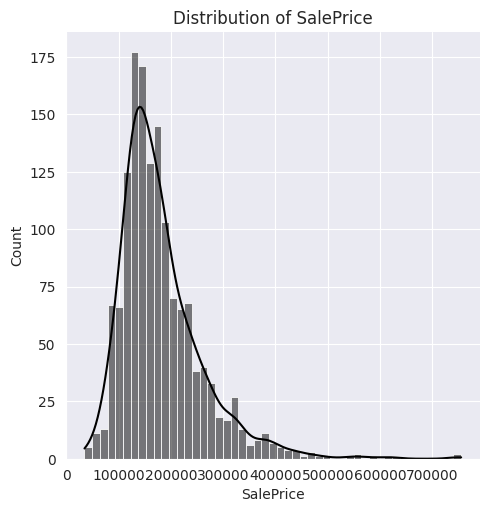

In [ ]:
dist_plot('SalePrice')

<Figure size 500x500 with 0 Axes>

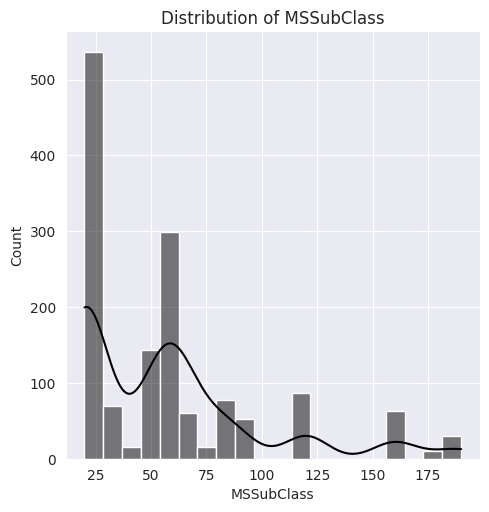

In [ ]:
dist_plot('MSSubClass')

<Figure size 500x500 with 0 Axes>

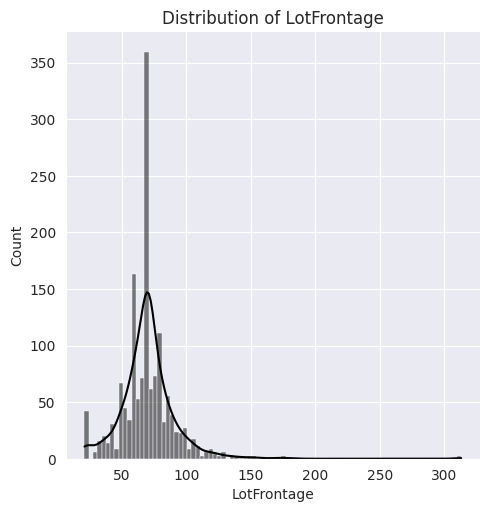

In [ ]:
dist_plot('LotFrontage')

<Figure size 500x500 with 0 Axes>

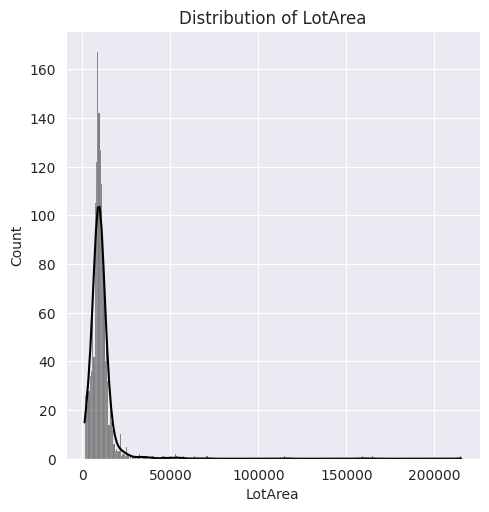

In [ ]:
dist_plot('LotArea')

<Figure size 500x500 with 0 Axes>

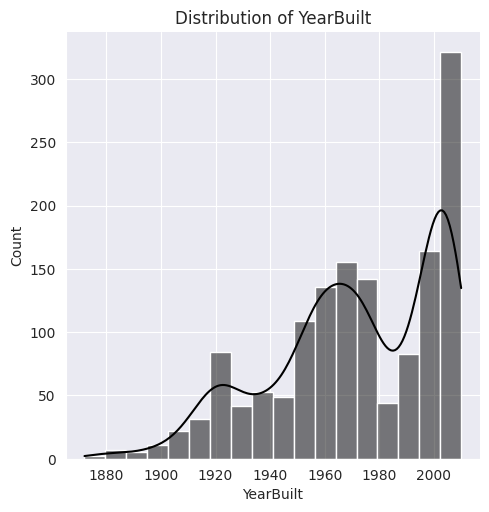

In [ ]:
dist_plot('YearBuilt')

<Figure size 500x500 with 0 Axes>

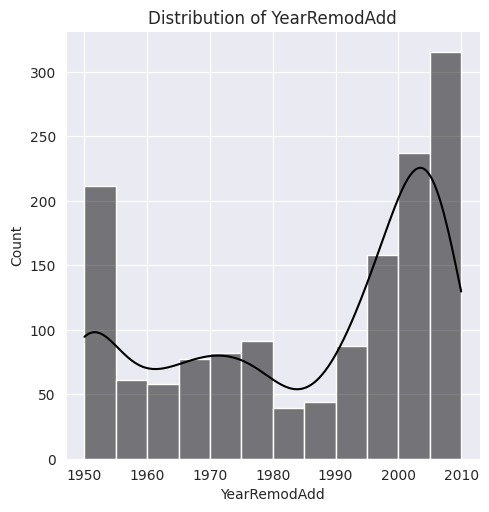

In [ ]:
dist_plot('YearRemodAdd')

<Figure size 500x500 with 0 Axes>

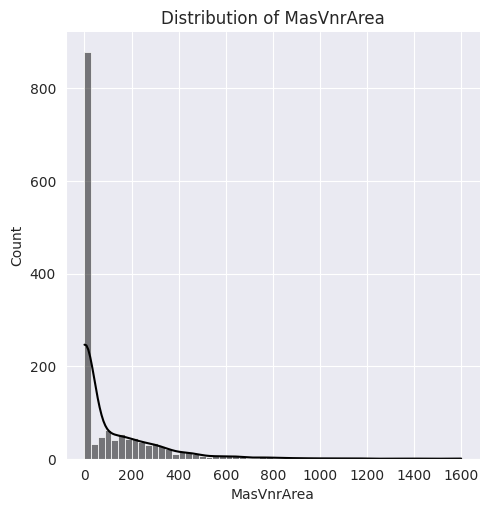

In [ ]:
dist_plot('MasVnrArea')

<Figure size 500x500 with 0 Axes>

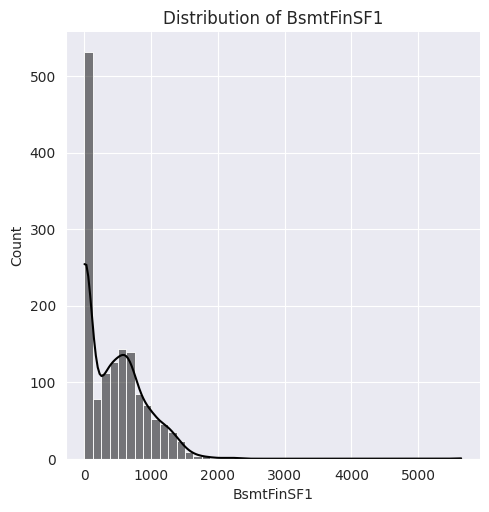

In [ ]:
dist_plot('BsmtFinSF1')

<Figure size 500x500 with 0 Axes>

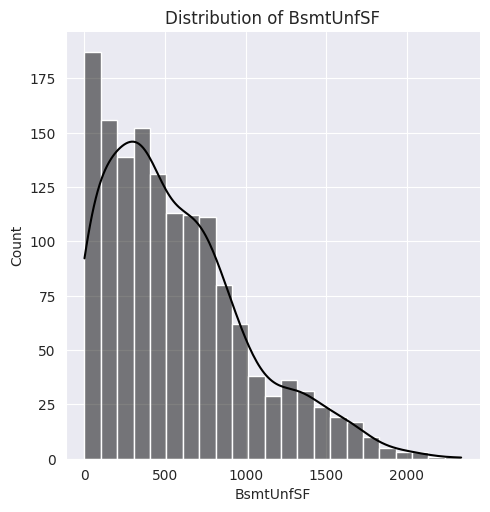

In [ ]:
dist_plot('BsmtUnfSF')

<Figure size 500x500 with 0 Axes>

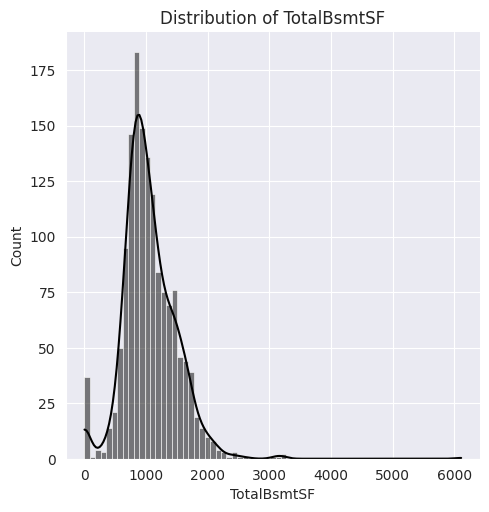

In [ ]:
dist_plot('TotalBsmtSF')

<Figure size 500x500 with 0 Axes>

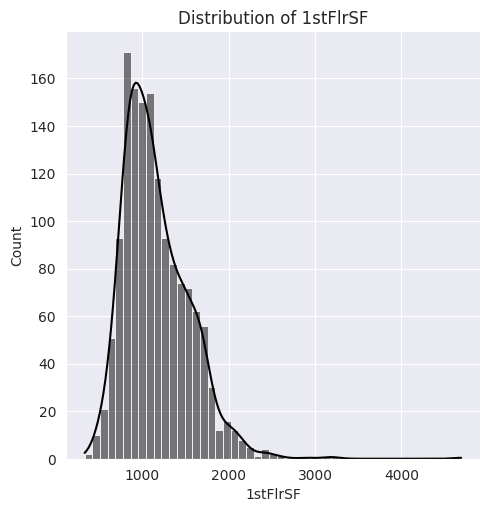

In [ ]:
dist_plot('1stFlrSF')

<Figure size 500x500 with 0 Axes>

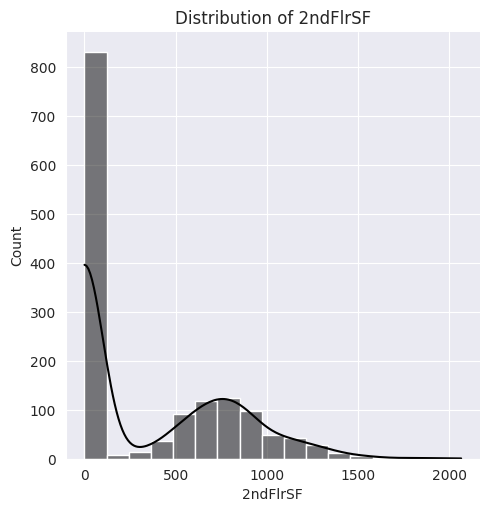

In [ ]:
dist_plot('2ndFlrSF')

<Figure size 500x500 with 0 Axes>

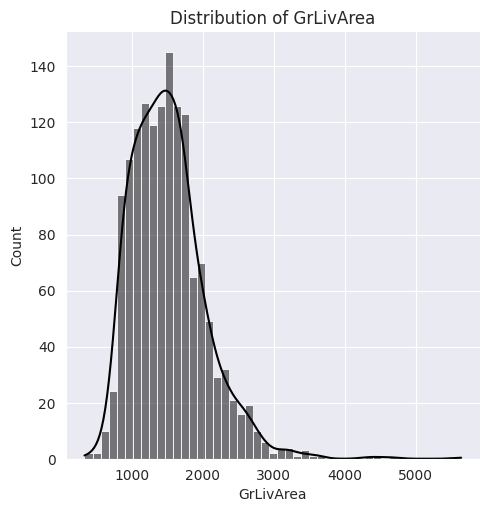

In [ ]:
dist_plot('GrLivArea')

<Figure size 500x500 with 0 Axes>

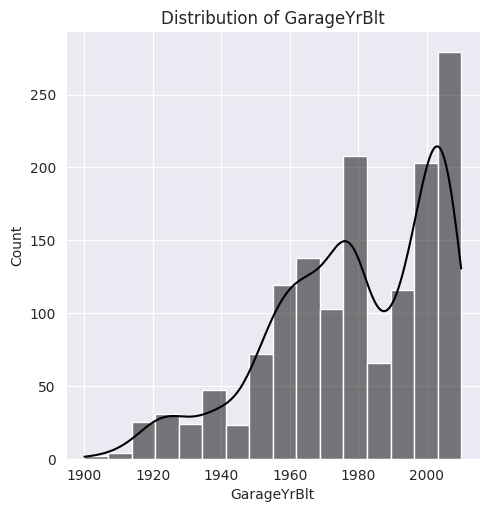

In [ ]:
dist_plot('GarageYrBlt')

<Figure size 500x500 with 0 Axes>

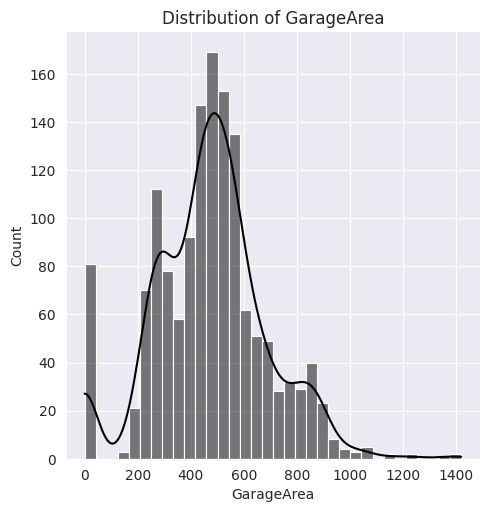

In [ ]:
dist_plot('GarageArea')

## 3.2 Correlation Bar <a id=3.2></a>

In [ ]:
df_train_2 = df_train.drop('SalePrice', axis=1)
df_train_2 = df_train_2.select_dtypes(include='number')

<Axes: title={'center': 'Correlation with SalePrice'}>

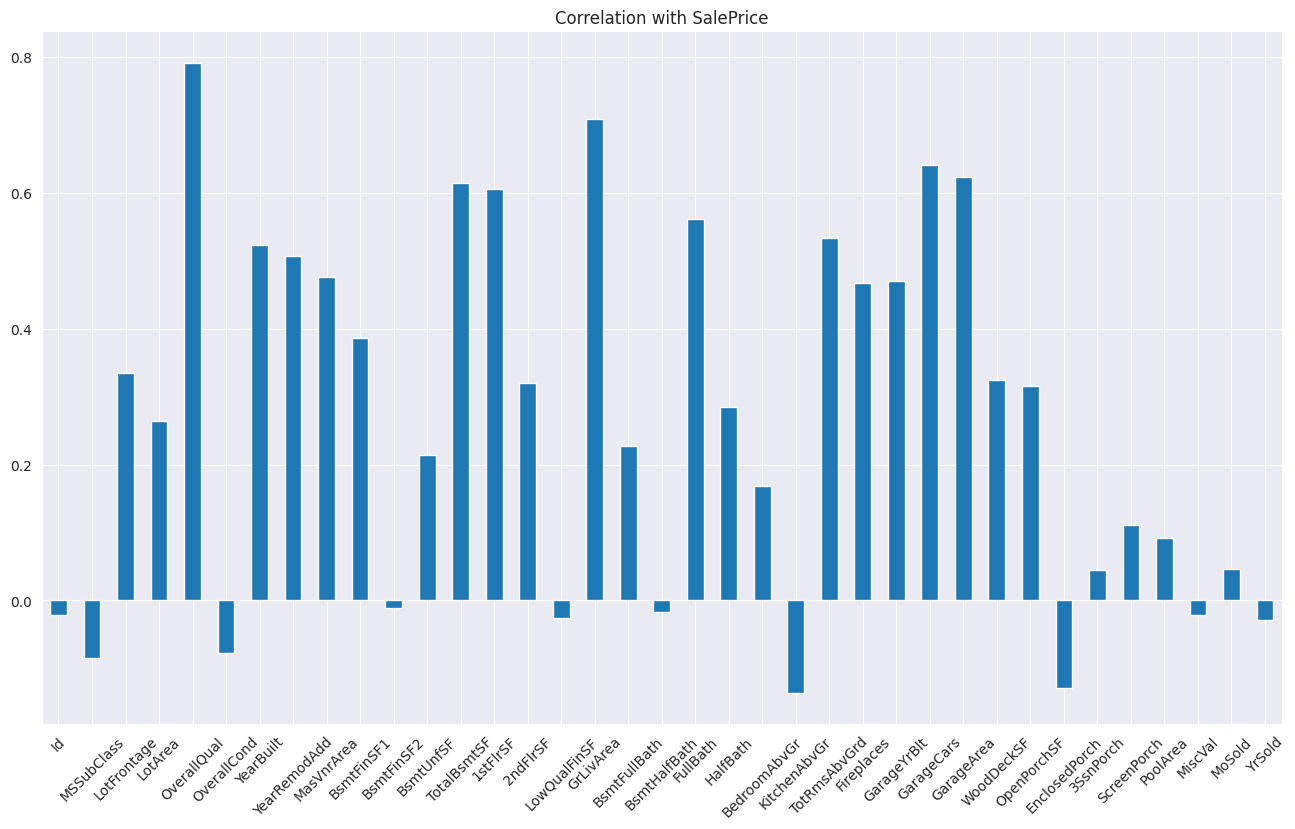

In [ ]:
df_train_2.corrwith(df_train['SalePrice']).plot.bar(
    figsize=(16,9), title = 'Correlation with SalePrice',
    rot = 45, grid = True
)

## 3.3 Correlation Heatmap <a id=3.3></a>

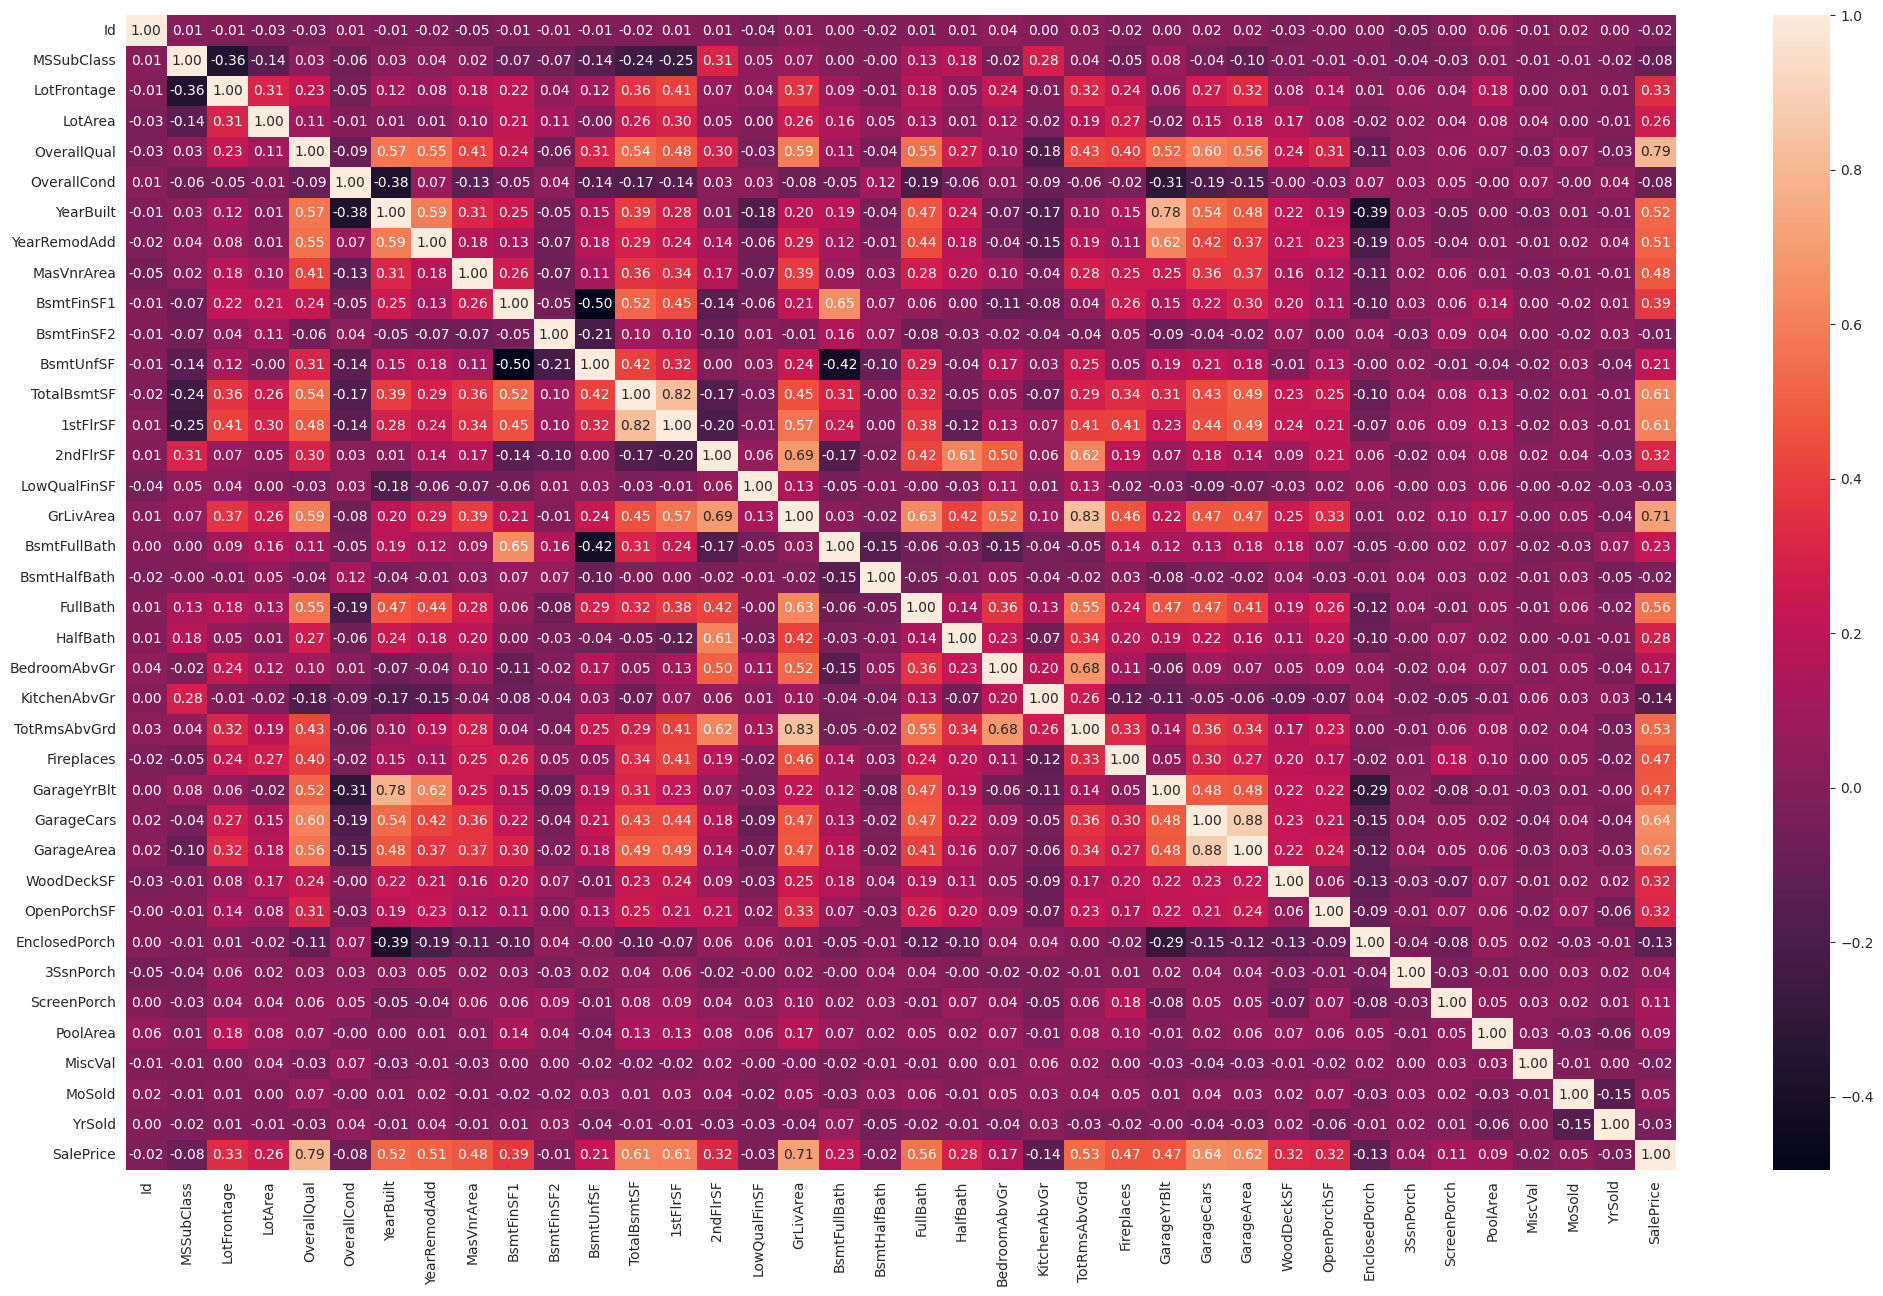

In [ ]:
plt.figure(figsize=(25, 15))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

### 3.3.1 Filtering High Correlated Featuers With SalePrice <a id=3.3.1></a>

In [ ]:
df_corr = df_train.corr(numeric_only=True)
high_corr = df_corr.index[abs(df_corr['SalePrice']) >= 0.5]
high_corr

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

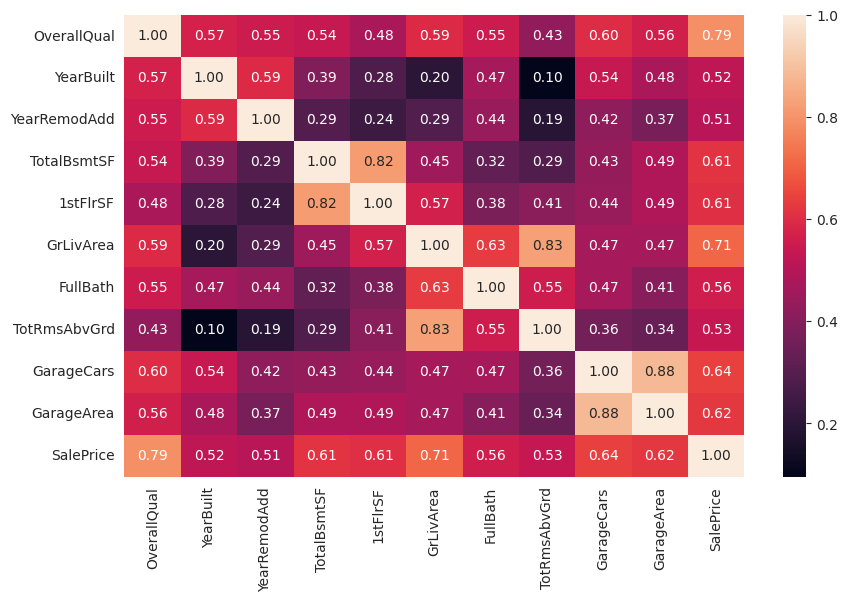

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_train[high_corr].corr(), annot=True, fmt='.2f')
plt.show()

# 4. Preprocessing <a id=4></a>

## 4.1 Encoding Categorical Variables <a id=4.1></a>

In [ ]:
df_train_encod_cols = df_train.select_dtypes(include='object').columns
df_train_encod_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

encoded_cols = encoder.fit_transform(df_train[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']])

encoded_cols = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']))
encoded_cols

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_train_encoded = pd.concat([df_train, encoded_cols], axis=1)
df_train_encoded.drop(df_train_encod_cols, axis=1, inplace=True)
df_train_encoded.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# 5. Preparing For Modelling <a id=5></a>

## 5.1 Spliting Dependent/Independent Variables <a id=5.1></a>

In [ ]:
X = df_train_encoded.drop('SalePrice', axis=1)
y = df_train_encoded['SalePrice']

print("X: ", X.shape)
print("y: ", y.shape)

X:  (1460, 234)
y:  (1460,)


## 5.2 Definning Train/Test Sets <a id=5.2></a>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (1168, 234)
X_test:  (292, 234)
y_train:  (1168,)
y_test:  (292,)


## 5.3 Feature Scaling <a id=5.3></a>

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 6. Modelling

## 6.1 Linear Regression <a id=6.1></a>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Creating instance of LinearRegression
regressor_mlr = LinearRegression()
# Fitting the model
regressor_mlr.fit(X_train, y_train)
# Prediction on test set
y_pred = regressor_mlr.predict(X_test)

print("Linear Regression R2_Score: ", r2_score(y_test, y_pred))

Linear Regression R2_Score:  -191709465794684.8


## 6.2 RandomForest Regression <a id=6.2></a>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Creating instance of RandomForest
regressor_rf = RandomForestRegressor()
# Traing rf model
regressor_rf.fit(X_train, y_train)
# Predicition on test set
y_pred = regressor_rf.predict(X_test)

print("Random Forest R2_Score: ", r2_score(y_test, y_pred))

Random Forest R2_Score:  0.8905363442278885


### 6.2.1 Hyperparameter Optimization on RandomForest Model <a id=6.2.1></a>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

regressor_rf_tuned = RandomForestRegressor()
# RandomizedSearch Params
params = {
    'n_estimators':[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'max_depth':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'max_features':['auto', 'sqrt'],
    'bootstrap':[True, False]
}

random_search = RandomizedSearchCV(
    estimator=regressor_rf_tuned,
    param_distributions=params,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=0,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
best_score = random_search.best_score_
best_params = random_search.best_params_

print("Best Score: ", best_score)
print("Best Params: ", best_params)